In [31]:
from sklearn import datasets as ds 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

housing_x , housing_y = ds.load_svmlight_file('housing.txt')
x_train, x_test, y_train, y_test = train_test_split(housing_x, housing_y, test_size=0.2)
# print (type(housing_y))
x_train_array = x_train.toarray()
x_test_array = x_test.toarray()

(102, 13)


# loss函数：$J(\theta)=\frac{1}{2m}\sum_{i=0}^m (h(x^i)-y^i)^2$
# 梯度：$J(\theta_j) = \frac{1}{m}\sum_{i=0}^m ((h(x^i)-y^i)*x_j^i)$

In [32]:
#初始化参数值
theta_array = np.zeros(14)
col_theta, = theta_array.shape

rate = 0.001
# print (theta_array)

row_train ,col_train = x_train_array.shape
train_column = np.ones(row_train)
x_train_array = np.column_stack((x_train_array,train_column))
row_train ,col_train = x_train_array.shape

row_test, col_test = x_test_array.shape
test_column = np.ones(row_test)
x_test_array = np.column_stack((x_test_array,test_column))
row_test, col_test = x_test_array.shape

[[-0.929026  -1.         0.293255  ...,  0.684805  -0.315673   1.       ]
 [-0.982374  -1.        -0.307918  ...,  1.        -0.765453   1.       ]
 [-0.995841  -0.56      -0.604106  ...,  0.960815  -0.0767108  1.       ]
 ..., 
 [-0.734607  -1.         0.293255  ..., -0.757275   0.159492   1.       ]
 [-0.805812  -1.         0.293255  ...,  1.        -0.258278   1.       ]
 [-0.985985  -1.        -0.43695   ...,  1.        -0.639625   1.       ]]


In [3]:
def function(x):
    sum_median = 0
    for i in range(col_theta): 
        sum_median = sum_median + theta_array[i]*x[i]
    return sum_median 

In [4]:
def train_loss():
    sum_loss = 0
    for x_term,y_term in zip(x_train_array,y_train):
        sum_loss = sum_loss + np.square(function(x_term) - y_term)
    return sum_loss / 2 / row_train

In [5]:
def test_loss():
    sum_loss = 0
    for x_term,y_term in zip(x_test_array,y_test):
        sum_loss = sum_loss + np.square(function(x_term) - y_term)
    return sum_loss / 2 / row_test

In [6]:
def compute_descent(num):
    sum = 0
    for x,y in zip(x_train_array,y_train):
        sum = sum + ( function(x) - y )*x[j]
    return rate * sum / row_train

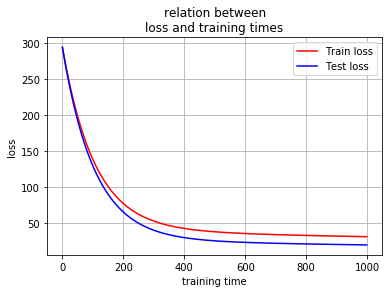

In [33]:
# 循环10000次  循环theta 循环求和
loss_train_tuple = []
loss_test_tupe = []
for i in range(1000):
    for j in range(col_theta):
        descent = compute_descent(j)
        theta_array[j] = theta_array[j] - descent
    loss_train_tuple.append(train_loss())
    loss_test_tupe.append(test_loss())
plt.title('relation between\nloss and training times')
plt.xlabel('training time')
plt.ylabel('loss')
plt.plot(loss_train_tuple,label= "Train loss",color = 'red')
plt.plot(loss_test_tupe,label= "Test loss",color = 'blue')
plt.legend(loc='upper right')
plt.grid()
plt.show()